In [ ]:
# Natalia Chostenko, Michał Pawlak - Projket WDUM
# Temat: Przewidywanie czy wypadek  drogowy będzie krytyczny

In [1]:
# Import bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCVs
from sklearn.model_selection import GridSearchCV

**Eksploracyjna analiza danych**

In [2]:
# 1.1 Załadowanie zbioru z pliku CSV
df_orig = pd.read_csv("DaneUSA_Wypadki.csv")
data = df_orig.copy()

In [3]:
# 1.2 Wstawienie kolumny 'Id' jako pierwszej kolumny
data.insert(0, 'Id', data.pop('Id'))
# Ustawienie Id jako indeksu
data = data.set_index("Id")

In [5]:
# 1.3  Wyświetlenie danych
data

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
Id,,,,,,,,,,,,,,,,,,,,,
1,2,2023-03-22 07:48:00,2023-03-22 09:59:58,33.974807,-118.123306,33.975149,-118.123709,0.033,Accident on Telegraph Rd from Paramount Blvd t...,Telegraph Rd,...,False,False,False,False,False,False,Day,Day,Day,Day
2,2,2023-03-31 16:46:22,2023-03-31 17:16:22,41.746105,-87.939023,41.746325,-87.939273,0.020,At S Quincy St - Accident.,S Quincy St,...,False,False,False,False,False,False,Day,Day,Day,Day
3,4,2023-03-20 14:49:00,2023-03-20 15:19:00,30.850665,-83.280610,30.852704,-83.280730,0.141,Crash on SR 7 both directions at E MOORE ST. A...,E College St,...,False,False,False,False,True,False,Day,Day,Day,Day
4,4,2023-03-28 12:16:00,2023-03-28 14:14:28,41.258103,-84.827833,41.255920,-84.830888,0.219,IN-37 is closed from IN--OH State Border (IN-3...,Allen Rd,...,False,False,False,False,False,False,Day,Day,Day,Day
5,2,2023-03-24 07:07:00,2023-03-24 09:13:51,45.387267,-111.196415,45.381846,-111.191543,0.443,Travelers can expect the following: Crash with...,Gallatin Rd,...,False,False,False,False,False,False,Night,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2649246,2,2020-01-06 20:54:00,2020-01-06 22:08:36,33.696102,-117.084844,33.696102,-117.084844,0.000,At Domenigoni Pky - Accident.,Winchester Rd,...,False,False,False,False,True,False,Night,Night,Night,Night
2649247,2,2020-01-06 21:14:00,2020-01-06 23:16:38,35.736667,-119.742500,35.736667,-119.742500,0.000,At Utica Ave - Accident.,I-5 N,...,False,False,False,False,False,False,Night,Night,Night,Night
2649248,2,2020-01-06 21:19:00,2020-01-06 22:19:37,34.075263,-118.281157,34.075263,-118.281157,0.000,At N Virgil Ave - Accident.,N Dillon St,...,False,False,True,True,False,False,Night,Night,Night,Night


In [19]:
# 1.4 Sprawdzenie typów danych kolumn
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2649250 entries, 1 to 2649250
Data columns (total 44 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Severity               int64  
 1   Start_Time             object 
 2   End_Time               object 
 3   Start_Lat              float64
 4   Start_Lng              float64
 5   End_Lat                float64
 6   End_Lng                float64
 7   Distance(mi)           float64
 8   Description            object 
 9   Street                 object 
 10  City                   object 
 11  County                 object 
 12  State                  object 
 13  Zipcode                object 
 14  Country                object 
 15  Timezone               object 
 16  Airport_Code           object 
 17  Weather_Timestamp      object 
 18  Temperature(F)         float64
 19  Wind_Chill(F)          float64
 20  Humidity(%)            float64
 21  Pressure(in)           float64
 22  Visibility(mi)         

In [8]:
# 1.5 Wyświetlenie informacji o kolumnach o typie  numerycznym
data.describe().round(2)

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2649250.00,2649250.00,2649250.00,2649250.00,2649250.00,2649250.00,2649250.00,2649250.00,2649250.00,2649250.00,2649250.00,2649250.00,2649250.00
mean,2.06,35.98,-94.66,35.98,-94.66,0.85,61.04,59.74,64.02,29.37,9.07,7.42,0.01
std,0.37,5.36,17.85,5.36,17.85,1.80,19.29,21.52,22.81,1.11,2.54,5.61,0.05
min,1.00,24.57,-124.55,24.57,-124.55,0.00,-45.00,-63.00,1.00,16.72,0.00,0.00,0.00
25%,2.00,32.92,-117.38,32.93,-117.37,0.07,48.00,46.00,48.00,29.20,10.00,3.00,0.00
50%,2.00,35.84,-86.74,35.84,-86.74,0.26,63.00,63.00,66.00,29.72,10.00,7.00,0.00
75%,2.00,40.05,-80.19,40.05,-80.19,0.94,76.00,76.00,83.00,29.97,10.00,10.00,0.00
max,4.00,49.00,-67.48,49.00,-67.48,155.19,196.00,196.00,100.00,58.63,100.00,1087.00,24.00


In [9]:
# 1.6 Obliczenie procentu brakujących danych w kolumnach
missing_percentagesResult = data.isna().sum().sort_values(ascending=False) / len(data)
missing_percentagesResult.round(3)

Severity                 0.0
Start_Time               0.0
Wind_Speed(mph)          0.0
Precipitation(in)        0.0
Weather_Condition        0.0
Amenity                  0.0
Bump                     0.0
Crossing                 0.0
Give_Way                 0.0
Junction                 0.0
No_Exit                  0.0
Railway                  0.0
Roundabout               0.0
Station                  0.0
Stop                     0.0
Traffic_Calming          0.0
Traffic_Signal           0.0
Turning_Loop             0.0
Sunrise_Sunset           0.0
Civil_Twilight           0.0
Nautical_Twilight        0.0
Wind_Direction           0.0
Visibility(mi)           0.0
Pressure(in)             0.0
City                     0.0
End_Time                 0.0
Start_Lat                0.0
Start_Lng                0.0
End_Lat                  0.0
End_Lng                  0.0
Distance(mi)             0.0
Description              0.0
Street                   0.0
County                   0.0
Humidity(%)   

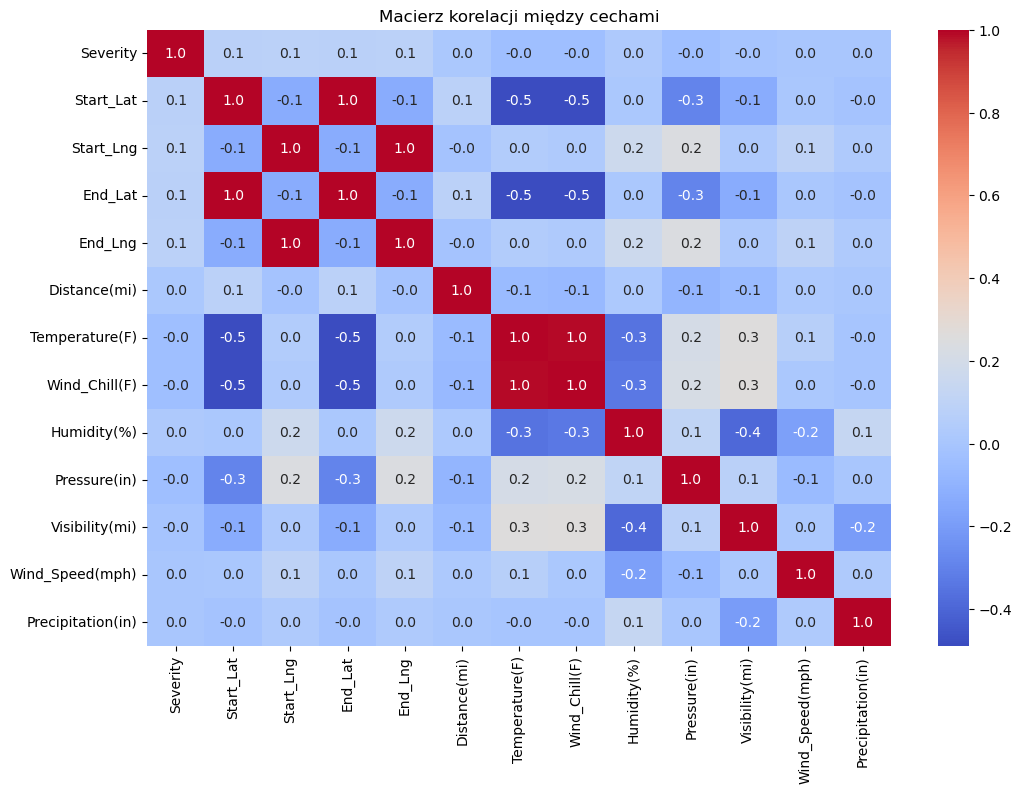

In [11]:
# 1.7 Tworzenie wykresu heatmap dla macierzy korelacji

# Wybranie kolumn numerycznych
numeric_columns = data.select_dtypes(include=['float64', 'int64'])

# Tworzenie wykresu heatmap dla macierzy korelacji
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt='.1f')

# df.corr(): Oblicza współczynniki korelacji między wszystkimi kolumnami w ramce danych df.
# annot=True: Wyświetla wartości współczynników korelacji wewnątrz każdej kratki 
# cmap='coolwarm': Określa paletę kolorów używaną do mapy cieplnej
# fmt='.2f': Określa format wyświetlania wartości liczbowych
plt.title('Macierz korelacji między cechami')
plt.show()

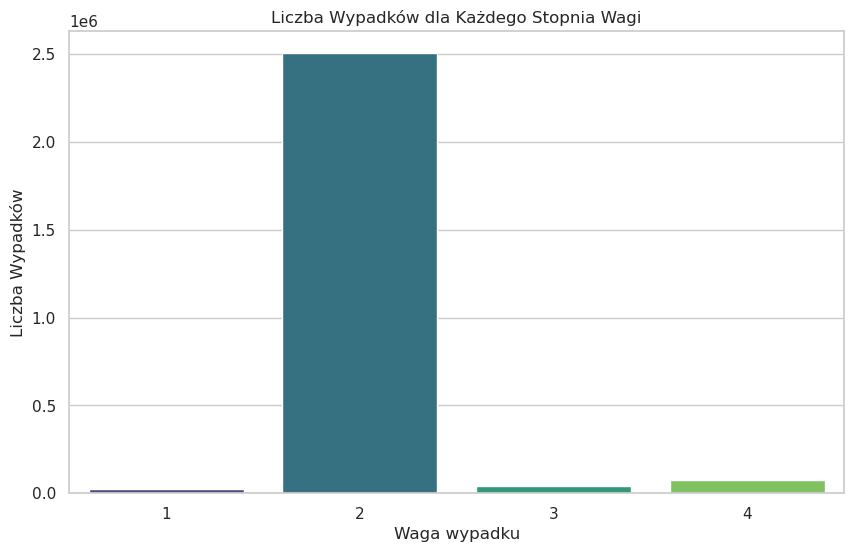

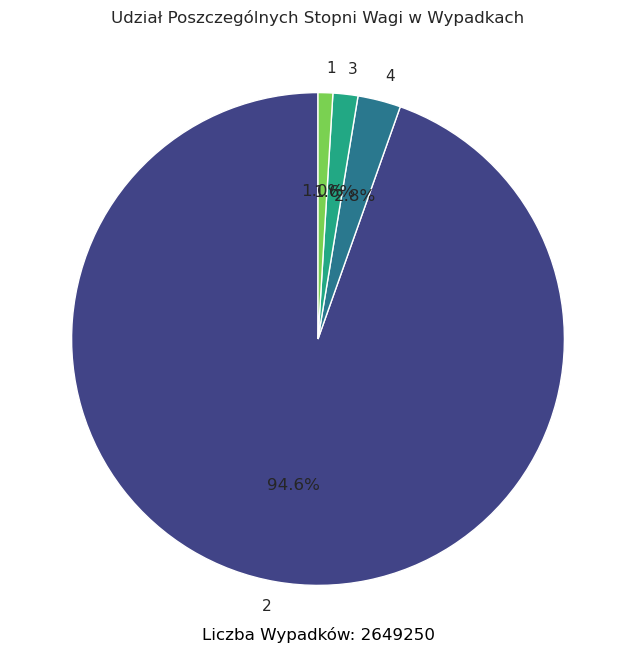

In [19]:
# 1.8 Tworzenie wykresów dot. wagi wypadków

# --------Wykres Słupkowy-------------------------------
# Ustawienia estetyki wykresu
sns.set(style="whitegrid")

# Stworzenie wykresu zliczającego ilość wypadków dla każdego stopnia wagi
plt.figure(figsize=(10, 6))
sns.countplot(x='Severity', data=data, palette='viridis')

plt.xlabel('Waga wypadku')
plt.ylabel('Liczba Wypadków')
plt.title('Liczba Wypadków dla Każdego Stopnia Wagi')
plt.show()


# --------Wykres Kołowy-------------------------------
# Zliczenie wystąpień każdego stopnia wagi
severity_counts = data['Severity'].value_counts()

# Określenie kolorów
colors = sns.color_palette('viridis', n_colors=len(severity_counts))

plt.figure(figsize=(8, 8))
plt.pie(severity_counts, labels=severity_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
total_accidents = len(data)
plt.text(0, -1.2, f'Liczba Wypadków: {total_accidents}', ha='center', va='center', fontsize=12, color='black')

plt.title('Udział Poszczególnych Stopni Wagi w Wypadkach')
plt.show()

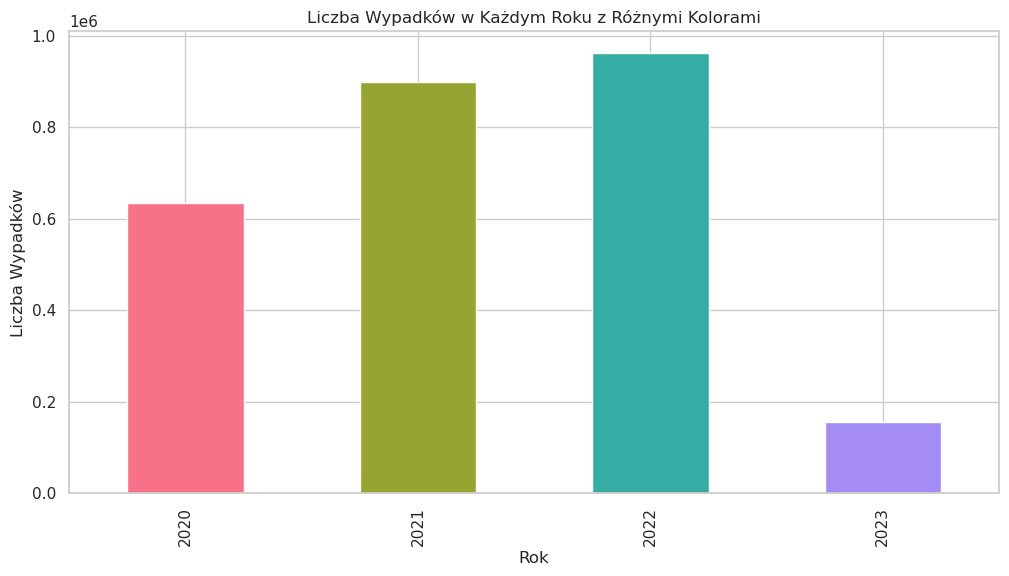

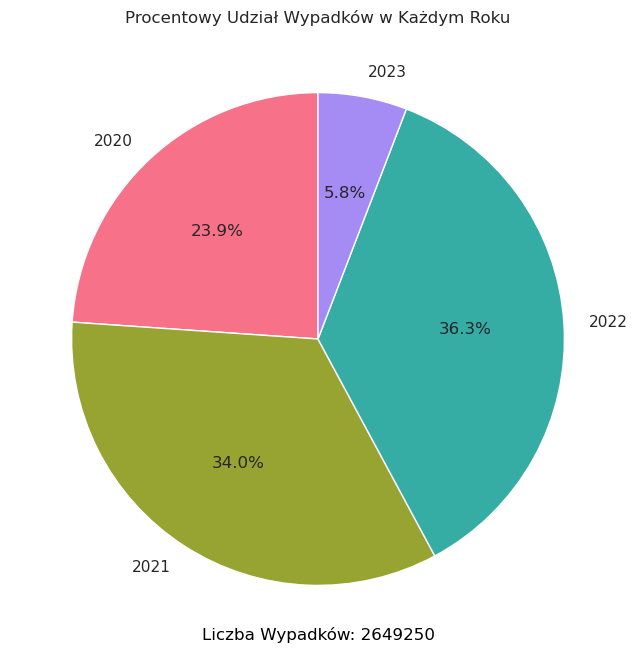

In [28]:
# 1.9 Tworzenie wykresów dot. liczby wypadków w poszczególnych latach

# --------Wykres Słupkowy-------------------------------

# Przetworzenie kolumny 'Start_Time' na typ daty
data['Start_Time'] = pd.to_datetime(data['Start_Time'])

# Stworzenie kolumny 'Year' zawierającą rok z daty
data['Year'] = data['Start_Time'].dt.year

# Zliczenie wypadków w każdym roku
accidents_per_year = data['Year'].value_counts().sort_index()

colors = sns.color_palette('husl', n_colors=len(accidents_per_year))
plt.figure(figsize=(12, 6))
accidents_per_year.plot(kind='bar', color=colors)
plt.xlabel('Rok')
plt.ylabel('Liczba Wypadków')
plt.title('Liczba Wypadków w Każdym Roku z Różnymi Kolorami')
plt.show()


# --------Wykres Kołowy-------------------------------

plt.figure(figsize=(8, 8))
plt.pie(accidents_per_year, labels=accidents_per_year.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.text(0, -1.2, f'Liczba Wypadków: {total_accidents}', ha='center', va='center', fontsize=12, color='black')
plt.title('Procentowy Udział Wypadków w Każdym Roku')
plt.show()

In [13]:
# 1.10 Identyfikacja wartości odstających na podstawie std (odchylenie standardowe)
def identify_outliers_std(series, threshold=3):
    mean = series.mean()
    std = series.std()
    lower_bound = mean - threshold * std
    upper_bound = mean + threshold * std
    outliers = (series < lower_bound) | (series > upper_bound)
    return outliers

# wartości odstające dla wszystkich kolumn numerycznych
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    outliers = identify_outliers_std(data[column])
    print(f'Wartosci odstajace {column}:\n{data[outliers][column]}\n')

Wartosci odstajace Severity:
Id
3          4
4          4
34         4
71         4
78         4
          ..
2648972    4
2648974    4
2649132    4
2649241    4
2649250    4
Name: Severity, Length: 74669, dtype: int64

Wartosci odstajace Start_Lat:
Series([], Name: Start_Lat, dtype: float64)

Wartosci odstajace Start_Lng:
Series([], Name: Start_Lng, dtype: float64)

Wartosci odstajace End_Lat:
Series([], Name: End_Lat, dtype: float64)

Wartosci odstajace End_Lng:
Series([], Name: End_Lng, dtype: float64)

Wartosci odstajace Distance(mi):
Id
40          6.360
113         9.823
290         7.708
331        14.286
335         6.511
            ...  
2647679     9.089
2648455     7.851
2648472    22.942
2648489     9.507
2648490     9.507
Name: Distance(mi), Length: 40390, dtype: float64

Wartosci odstajace Temperature(F):
Id
211        3.0
1105      -3.0
1736      -6.0
2117       2.0
2454       3.0
          ... 
2643033   -2.0
2644141   -8.0
2645951    3.0
2645953    3.0
2648381    3.0


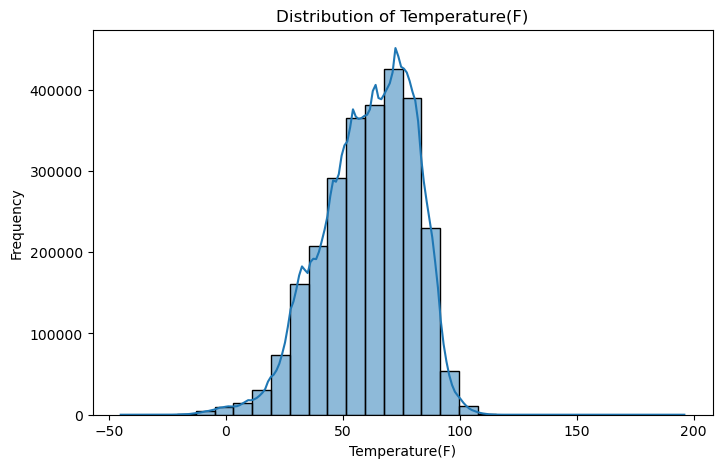

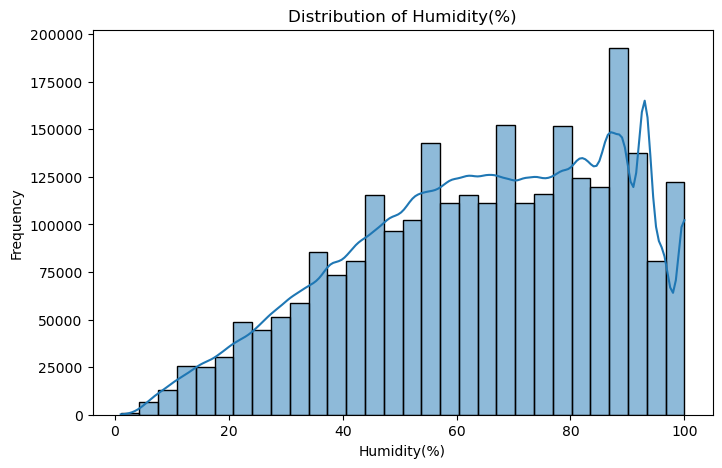

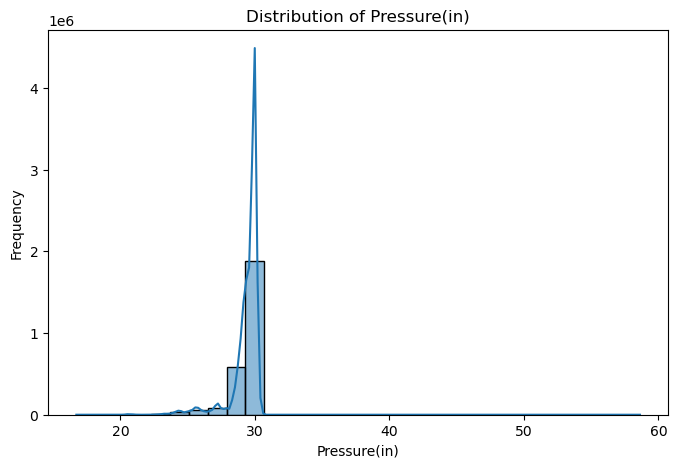

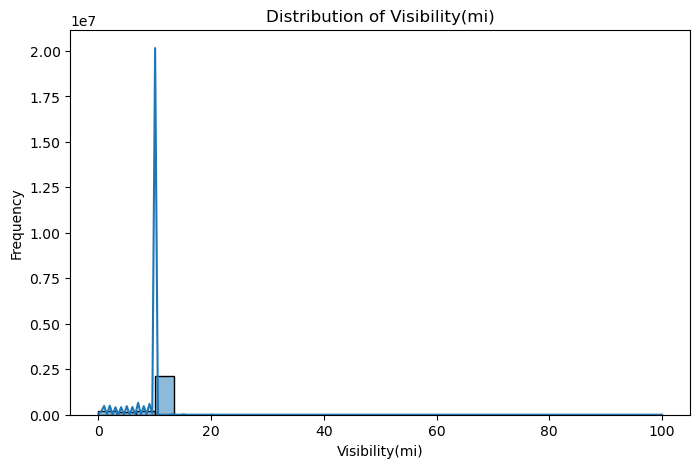

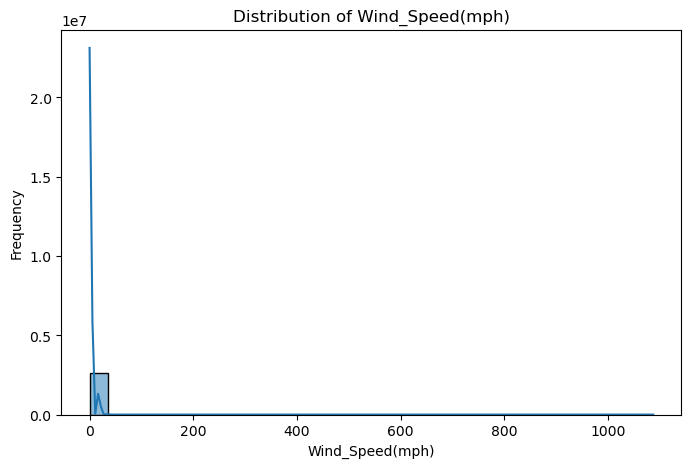

In [15]:
# 1.11 Rozkłady cech numerycznych
num_features = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']

for feature in num_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

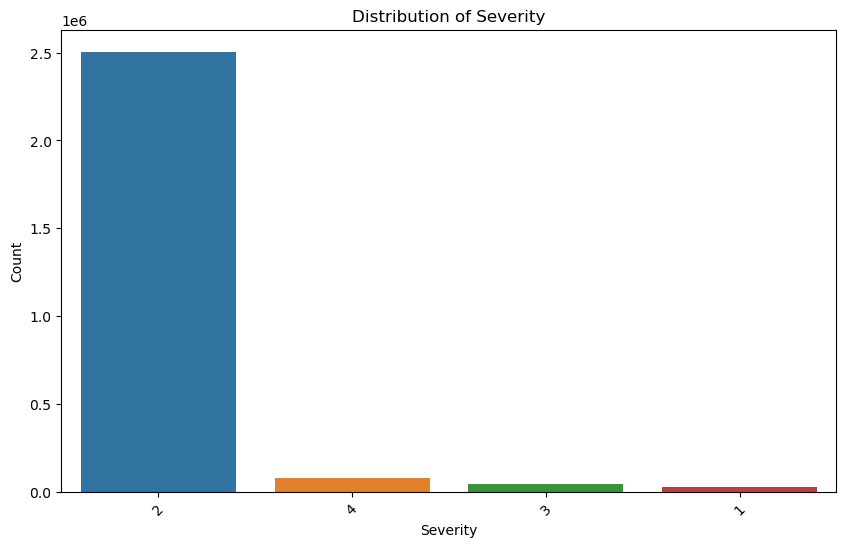

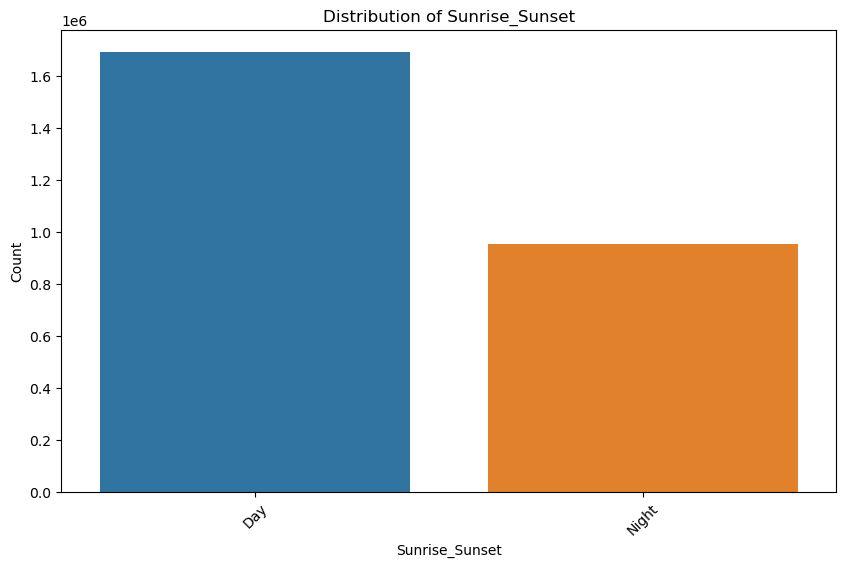

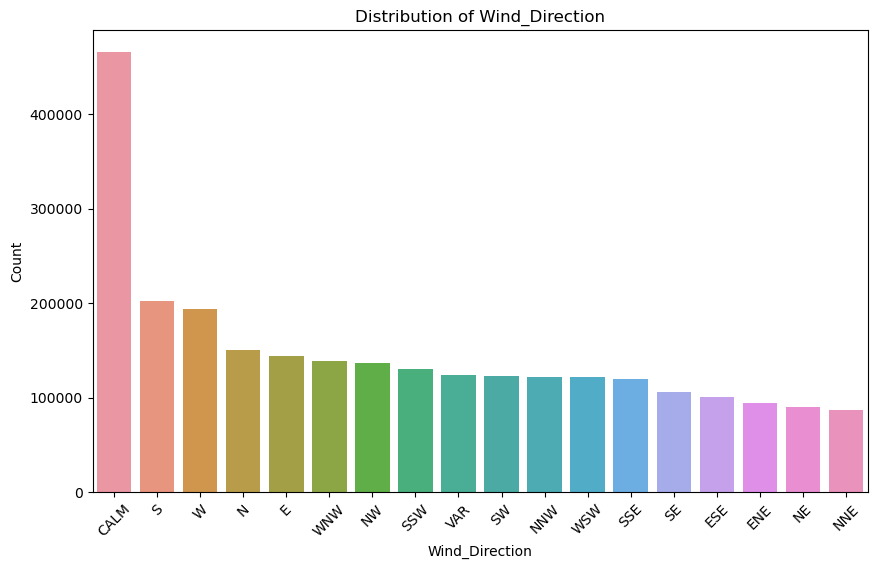

In [18]:
# 1.12 Rozkłady cech kategorialnych
cat_features = ['Severity', 'Sunrise_Sunset', 'Wind_Direction']

for feature in cat_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=data, order=data[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

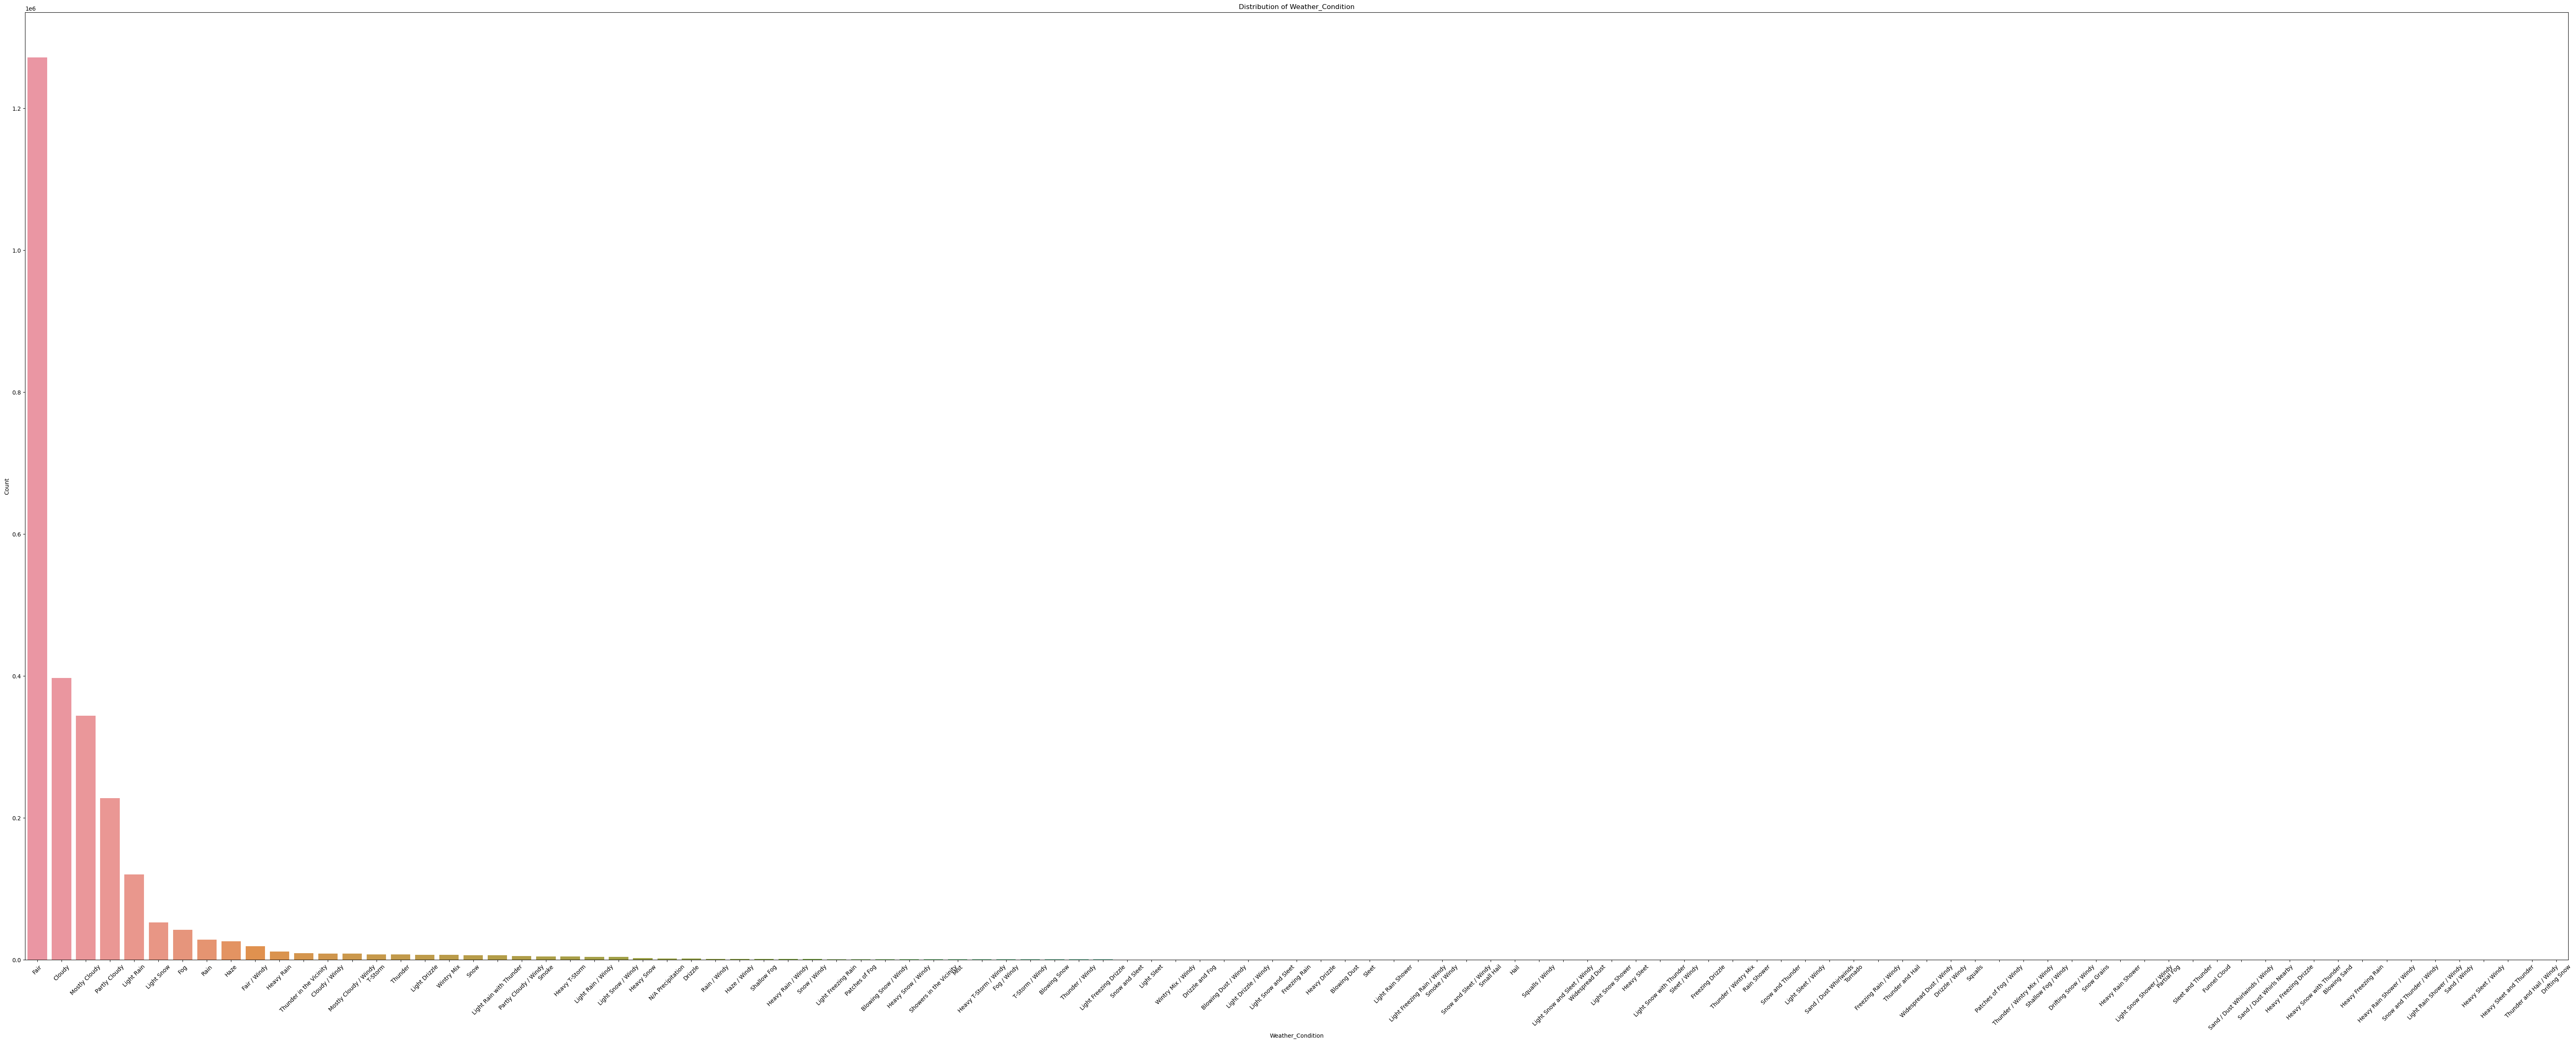

In [26]:
# 1.13 Rozkłady cech kategorialnych
cat_features = ['Weather_Condition']

for feature in cat_features:
    plt.figure(figsize=(80, 30))
    sns.countplot(x=feature, data=data, order=data[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()



In [4]:
# 2.1 Przepisanie kolumn z day-night
# Stworzenie mapowania unikalnych wartości 'Day' i 'Night' na liczby
day_night_mapping = {'Day': 1, 'Night': 0}

# Zastosowanie mapowania do każdej z kolumn
data['Sunrise_Sunset_Num'] = data['Sunrise_Sunset'].map(day_night_mapping)
data['Civil_Twilight_Num'] = data['Civil_Twilight'].map(day_night_mapping)
data['Nautical_Twilight_Num'] = data['Nautical_Twilight'].map(day_night_mapping)
data['Astronomical_Twilight_Num'] = data['Astronomical_Twilight'].map(day_night_mapping)

# Wyświetlenie zmienionego zbioru danych z nowymi kolumnami numerycznymi
print(data[['Sunrise_Sunset', 'Sunrise_Sunset_Num']])
print(data[['Civil_Twilight', 'Civil_Twilight_Num']])
print(data[['Nautical_Twilight', 'Nautical_Twilight_Num']])
print(data[['Astronomical_Twilight', 'Astronomical_Twilight_Num']])


        Sunrise_Sunset  Sunrise_Sunset_Num
Id                                        
1                  Day                   1
2                  Day                   1
3                  Day                   1
4                  Day                   1
5                Night                   0
...                ...                 ...
2649246          Night                   0
2649247          Night                   0
2649248          Night                   0
2649249          Night                   0
2649250          Night                   0

[2649250 rows x 2 columns]
        Civil_Twilight  Civil_Twilight_Num
Id                                        
1                  Day                   1
2                  Day                   1
3                  Day                   1
4                  Day                   1
5                  Day                   1
...                ...                 ...
2649246          Night                   0
2649247          Night    

In [6]:
# 2.2 Przepisanie stanów 
state_mapping = {state: idx+1 for idx, state in enumerate(data['State'].unique())}

# Zastosowanie mapowania do kolumny 'State' i stworzenie nowej kolumny 'State_Num'
data['State_Num'] = data['State'].map(state_mapping)

# Wyświetlenie zmienionego zbioru danych z nową kolumną 'State_Num'
print(data[['State', 'State_Num']])


        State  State_Num
Id                      
1          CA          1
2          IL          2
3          GA          3
4          IN          4
5          MT          5
...       ...        ...
2649246    CA          1
2649247    CA          1
2649248    CA          1
2649249    MI         11
2649250    MD         38

[2649250 rows x 2 columns]


In [7]:
# 2.3 Przepisanie Wind_Direction 
wind_direction_mapping = {direction: idx+1 for idx, direction in enumerate(data['Wind_Direction'].unique())}

# Zastosowanie mapowania do kolumny 'Wind_Direction' i stworzenie nowej kolumny 'Wind_Direction_Num'
data['Wind_Direction_Num'] = data['Wind_Direction'].map(wind_direction_mapping)

# Wyświetlenie zmienionego zbioru danych z nową kolumną 'Wind_Direction_Num'
print(data[['Wind_Direction', 'Wind_Direction_Num']])


        Wind_Direction  Wind_Direction_Num
Id                                        
1                    E                   1
2                    S                   2
3                  NNE                   3
4                    N                   4
5                  ENE                   5
...                ...                 ...
2649246            NNE                   3
2649247            SSE                  16
2649248            NNE                   3
2649249            WSW                  15
2649250            NNW                   6

[2649250 rows x 2 columns]


In [8]:
# 2.4 Przekształcenie kolumny 'Start_Time' i 'End_Time' na datetime
data['Start_Time'] = pd.to_datetime(data['Start_Time'])
data['End_Time'] = pd.to_datetime(data['End_Time'])

# Przekształcenie datetime na timestampy (czas UNIX)
data['Start_Time_UNIX'] = data['Start_Time'].astype(int) / 10**9
data['End_Time_UNIX'] = data['End_Time'].astype(int) / 10**9

# Wyświetlenie zmienionych kolumn
print(data[['Start_Time', 'Start_Time_UNIX']])
print(data[['End_Time', 'End_Time_UNIX']])


                 Start_Time  Start_Time_UNIX
Id                                          
1       2023-03-22 07:48:00     1.679471e+09
2       2023-03-31 16:46:22     1.680281e+09
3       2023-03-20 14:49:00     1.679324e+09
4       2023-03-28 12:16:00     1.680006e+09
5       2023-03-24 07:07:00     1.679642e+09
...                     ...              ...
2649246 2020-01-06 20:54:00     1.578344e+09
2649247 2020-01-06 21:14:00     1.578345e+09
2649248 2020-01-06 21:19:00     1.578346e+09
2649249 2020-01-01 00:08:02     1.577837e+09
2649250 2020-01-01 00:31:17     1.577839e+09

[2649250 rows x 2 columns]
                   End_Time  End_Time_UNIX
Id                                        
1       2023-03-22 09:59:58   1.679479e+09
2       2023-03-31 17:16:22   1.680283e+09
3       2023-03-20 15:19:00   1.679326e+09
4       2023-03-28 14:14:28   1.680013e+09
5       2023-03-24 09:13:51   1.679649e+09
...                     ...            ...
2649246 2020-01-06 22:08:36   1.578349e+09


In [9]:
# 2.5 Przekształcenie kolumny 'Start_Time' na cechy liczbowe
data['Start_Time_Year'] = data['Start_Time'].dt.year
data['Start_Time_Month'] = data['Start_Time'].dt.month
data['Start_Time_Day'] = data['Start_Time'].dt.day
data['Start_Time_Hour'] = data['Start_Time'].dt.hour
data['Start_Time_Minute'] = data['Start_Time'].dt.minute
data['Start_Time_Second'] = data['Start_Time'].dt.second

# Podobnie dla kolumny 'End_Time' (jeśli jest to potrzebne)
data['End_Time_Year'] = data['End_Time'].dt.year
data['End_Time_Month'] = data['End_Time'].dt.month
data['End_Time_Day'] = data['End_Time'].dt.day
data['End_Time_Hour'] = data['End_Time'].dt.hour
data['End_Time_Minute'] = data['End_Time'].dt.minute
data['End_Time_Second'] = data['End_Time'].dt.second

# Usunięcie kolumn 'Start_Time' i 'End_Time', jeśli są niepotrzebne
data = data.drop(columns=['Start_Time', 'End_Time'])


In [10]:
# 2.6 wykluczenie kolumn
columns_to_exclude = ['Street', 'City', 'County', 'Zipcode', 'Timezone', 'Weather_Timestamp', 'Airport_Code', 'Description', 'State', 'Country', 'Weather_Condition', 'Wind_Direction', 'Astronomical_Twilight', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight' ]
data = data.drop(columns=columns_to_exclude)



In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2649250 entries, 1 to 2649250
Data columns (total 46 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Severity                   int64  
 1   Start_Lat                  float64
 2   Start_Lng                  float64
 3   End_Lat                    float64
 4   End_Lng                    float64
 5   Distance(mi)               float64
 6   Temperature(F)             float64
 7   Wind_Chill(F)              float64
 8   Humidity(%)                float64
 9   Pressure(in)               float64
 10  Visibility(mi)             float64
 11  Wind_Speed(mph)            float64
 12  Precipitation(in)          float64
 13  Amenity                    bool   
 14  Bump                       bool   
 15  Crossing                   bool   
 16  Give_Way                   bool   
 17  Junction                   bool   
 18  No_Exit                    bool   
 19  Railway                    bool   
 20  Ro

**Algorytmy klasyfikacji**

In [13]:
# 3.1 Podział danych na zbiór uczący i testowy

X = data.drop(['Severity'], axis=1)  # cechy
y = data['Severity']  # etykiety 

# Podział na zbiór uczący (80%) i testowy (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

print("Rozmiar zbioru uczącego (cechy):", X_train.shape)
print("Rozmiar zbioru testowego (cechy):", X_test.shape)
print("Rozmiar zbioru uczącego (etykiety):", y_train.shape)
print("Rozmiar zbioru testowego (etykiety):", y_test.shape)

Rozmiar zbioru uczącego (cechy): (2119400, 45)
Rozmiar zbioru testowego (cechy): (529850, 45)
Rozmiar zbioru uczącego (etykiety): (2119400,)
Rozmiar zbioru testowego (etykiety): (529850,)


In [11]:
# 3.2 Algorytm k najbliższych sąsiadów

model = KNeighborsClassifier(n_neighbors=5)

model.fit(X_train, y_train)

preds = model.predict(X_train)
print('Train data accuracy: ', accuracy_score(y_train, preds))

preds = model.predict(X_test)
print('Test data accuracy: ', accuracy_score(y_test, preds))

Train data accuracy:  0.9536491459847126
Test data accuracy:  0.9421892988581674


In [13]:
# 3.3 Tworzenie modelu regresji liniowej
linear_model = LinearRegression()

# Trenowanie modelu na danych uczących
linear_model.fit(X_train, y_train)

# Prognozowanie na zbiorze uczącym i testowym
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

# Obliczenie MSE
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Obliczenie R^2
r2_train = model.score(X_train, y_train)
r2_test = model.score(X_test, y_test)

print(f"MSE na zbiorze uczącym: {mse_train:.2f}")
print(f"MSE na zbiorze testowym:  {mse_test:.2f}")
print(f"R^2 na zbiorze uczącym: {r2_train:.2f}")
print(f"R^2 na zbiorze testowym: {r2_test:.2f}")

MSE na zbiorze uczącym: 0.13
MSE na zbiorze testowym:  0.13
R^2 na zbiorze uczącym: 0.95
R^2 na zbiorze testowym: 0.94


In [14]:
# 3.4 Tworzenie modelu Random Forest

# Inicjalizacja modelu 
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=20)

# Trenowanie modelu na danych uczących
random_forest_model.fit(X_train, y_train)

# Prognozowanie na zbiorze uczącym i testowym
y_train_pred_rf = random_forest_model.predict(X_train)
y_test_pred_rf = random_forest_model.predict(X_test)

# Ocena jakości modelu
accuracy_train_rf = accuracy_score(y_train, y_train_pred_rf)
accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)

# Wyświetlenie wyników
print(f"Random Forest - Train Accuracy: {accuracy_train_rf:.4f}")
print(f"Random Forest - Test Accuracy: {accuracy_test_rf:.4f}")

# Wyświetlenie raportu klasyfikacji
classification_report_rf = classification_report(y_test, y_test_pred_rf)
print("\nClassification Report - Random Forest:")
print(classification_report_rf)

Random Forest - Train Accuracy: 0.9922
Random Forest - Test Accuracy: 0.9583

Classification Report - Random Forest:
              precision    recall  f1-score   support

           1       0.81      0.75      0.77      5036
           2       0.97      0.99      0.98    501121
           3       0.80      0.70      0.74      8681
           4       0.39      0.23      0.29     15012

    accuracy                           0.96    529850
   macro avg       0.74      0.66      0.70    529850
weighted avg       0.95      0.96      0.95    529850



In [ ]:
# 3.5 Optymalizacja hiperparametrów dla modelu Random Forest przy użyciu metody przeszukiwania siatkowego

# Inicjalizacja modelu Random Forest
random_forest_model = RandomForestClassifier(random_state=42)

# Definicja siatki hiperparametrów do przeszukania
param_grid = {
    'n_estimators': [50, 100, 150],  # Przykładowe wartości dla liczby drzew
    'max_depth': [None, 10, 20],  # Przykładowe wartości dla maksymalnej głębokości drzewa
    'min_samples_split': [2, 5, 10],  # Przykładowe wartości dla minimalnej liczby próbek wymaganych do podziału węzła
    'min_samples_leaf': [1, 2, 4]  # Przykładowe wartości dla minimalnej liczby próbek wymaganych w liściu
}

# Inicjalizacja obiektu GridSearchCV
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=3, scoring='accuracy')

# Przeszukiwanie siatkowe na danych uczących
grid_search.fit(X_train, y_train)

# Wyświetlenie najlepszych hiperparametrów
print("Najlepsze hiperparametry:")
print(grid_search.best_params_)

# Ocena jakości modelu na danych testowych
best_rf_model = grid_search.best_estimator_
y_test_pred_best = best_rf_model.predict(X_test)
accuracy_test_best = accuracy_score(y_test, y_test_pred_best)

print(f"Random Forest - Test Accuracy (po optymalizacji): {accuracy_test_best:.4f}")